# **Applying deep learning models on nyse dataset**

In [81]:
# Giving access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [88]:
prices = '/content/drive/My Drive/prices.csv'
securities = '/content/drive/My Drive/securities.csv'
prices_split_adjusted = '/content/drive/My Drive/prices-split-adjusted.csv'
fundamentals = '/content/drive/My Drive/fundamentals.csv'

In [89]:
# Load the datasets
prices = pd.read_csv(prices)
securities = pd.read_csv(securities)
prices_split_adjusted = pd.read_csv(prices_split_adjusted)
fundamentals = pd.read_csv(fundamentals)

In [90]:
prices

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [91]:
# Display the first few rows of each dataset
print(prices.head())
print(securities.head())
print(prices_split_adjusted.head())
print(fundamentals.head())

                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  
  Ticker symbol             Security SEC filings             GICS Sector  \
0           MMM           3M Company     reports             Industrials   
1           ABT  Abbott Laboratories     reports             Health Care   
2          ABBV               AbbVie     reports             Health Care   
3           ACN        Accenture plc     reports  Information Technology   
4          ATVI  Activision Blizzard     re

# **Model Trainig and Feature Enginering for AAPL Stock Data**

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for a specific stock, e.g., 'AAPL'
stock_data = prices_split_adjusted[prices_split_adjusted['symbol'] == 'AAPL'].copy()
stock_data.set_index('date', inplace=True)

# Create features based on historical prices
stock_data['SMA_50'] = stock_data['close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['close'].rolling(window=200).mean()
stock_data['Exp1'] = stock_data['close'].ewm(span=12, adjust=False).mean()
stock_data['Exp2'] = stock_data['close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = stock_data['Exp1'] - stock_data['Exp2']
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()
stock_data['Delta'] = stock_data['close'].diff()
stock_data['Gain'] = stock_data['Delta'].clip(lower=0)
stock_data['Loss'] = -stock_data['Delta'].clip(upper=0)
stock_data['Avg_Gain'] = stock_data['Gain'].rolling(window=14).mean()
stock_data['Avg_Loss'] = stock_data['Loss'].rolling(window=14).mean()
stock_data['RS'] = stock_data['Avg_Gain'] / stock_data['Avg_Loss']
stock_data['RSI'] = 100 - (100 / (1 + stock_data['RS']))

# Drop rows with NaN values
stock_data.dropna(inplace=True)

# Feature Selection for selected data

# Define features and target variable
features = [ 'SMA_50', 'SMA_200', 'MACD', 'Signal_Line', 'RSI','high','low','open']
X = stock_data[features]
y = stock_data['close'].shift(-1).dropna()

# Align features with target variable
X = X[:-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
stock_data

,symbol,open,close,low,high,volume,SMA_50,SMA_200,Exp1,Exp2,MACD,Signal_Line,Delta,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI
date,,,,,,,,,,,,,,,,,,,
2010-10-18,AAPL,45.495716,45.428570,44.898571,45.571430,273252700.0,38.637428,35.068793,42.776446,41.246957,1.529489,1.256380,0.465714,0.465714,-0.000000,0.406837,0.089082,4.567010,82.037035
2010-10-19,AAPL,43.342857,44.212856,42.860001,44.824287,308196000.0,38.773828,35.136993,42.997432,41.466653,1.530779,1.311260,-1.215714,0.000000,1.215714,0.401633,0.175918,2.283063,69.540640
2010-10-20,AAPL,44.142857,44.361427,43.838570,44.892857,180406100.0,38.919885,35.205671,43.207277,41.681081,1.526197,1.354247,0.148571,0.148571,-0.000000,0.412245,0.138979,2.966227,74.787124
2010-10-21,AAPL,44.622856,44.217144,43.828571,44.962856,137865000.0,39.089400,35.276064,43.362641,41.868937,1.493704,1.382139,-0.144283,0.000000,0.144283,0.412245,0.136735,3.014928,75.092952
2010-10-22,AAPL,44.152859,43.924286,43.757141,44.291428,93194500.0,39.248485,35.345271,43.449048,42.021185,1.427863,1.391284,-0.292858,0.000000,0.292858,0.412245,0.118061,3.491793,77.737174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0,112.887600,105.976600,115.286227,113.801230,1.484997,1.076040,0.229996,0.229996,-0.000000,0.630713,0.101428,6.218340,86.146400
2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0,112.880200,106.050300,115.589885,114.057436,1.532449,1.167322,0.740005,0.740005,-0.000000,0.623571,0.101428,6.147923,86.009923
2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0,112.864400,106.111200,115.769903,114.257626,1.512277,1.236313,-0.500000,0.000000,0.500000,0.546428,0.137142,3.984391,79.937367


# **LSTM Model**

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [94]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

In [95]:
# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

In [96]:
# Reshape input to be [samples, time steps, features]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [97]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2460 - val_loss: 0.0802
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0539 - val_loss: 0.0153
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0146 - val_loss: 0.0048
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0081 - val_loss: 0.0032
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 0.0012
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0041 - val_loss: 0.0010
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - val_loss: 6.4894e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - val_loss: 6.7574e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 4.3334e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 4.3187e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026

In [100]:
# Make predictions
y_pred_lstm_scaled = model.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

# Calculate performance metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)

print(f'LSTM:')
print(f'Mean Squared Error: {mse_lstm}')
print(f'R^2 Score: {r2_lstm}')
print(f'Mean Absolute Error: {mae_lstm}')
print(f'Mean Absolute Percentage Error: {mape_lstm}\n')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
LSTM:
Mean Squared Error: 3.377487079019026
R^2 Score: 0.9944398564915492
Mean Absolute Error: 1.3875624127831832
Mean Absolute Percentage Error: 0.016486913544258935



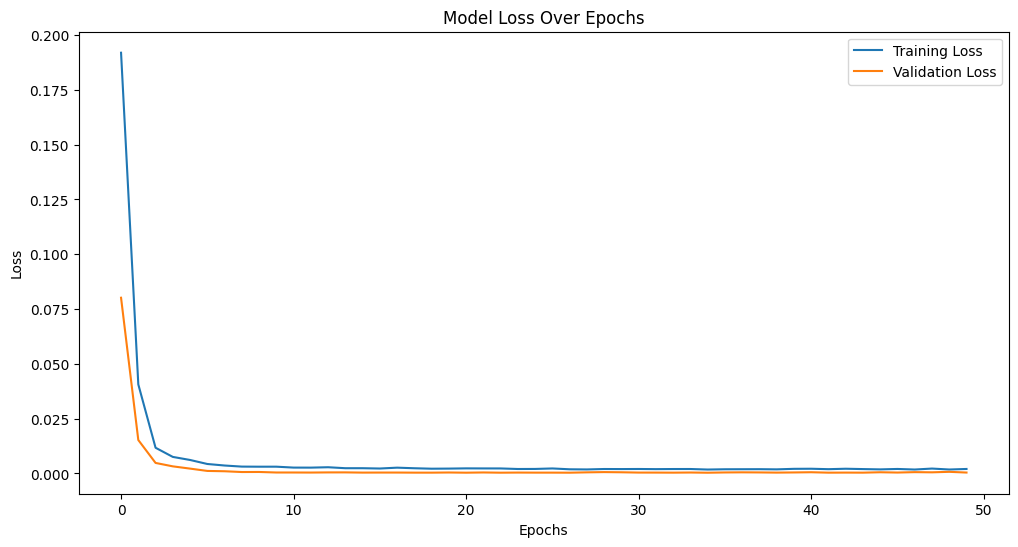

In [102]:
# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **GRU Model**

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

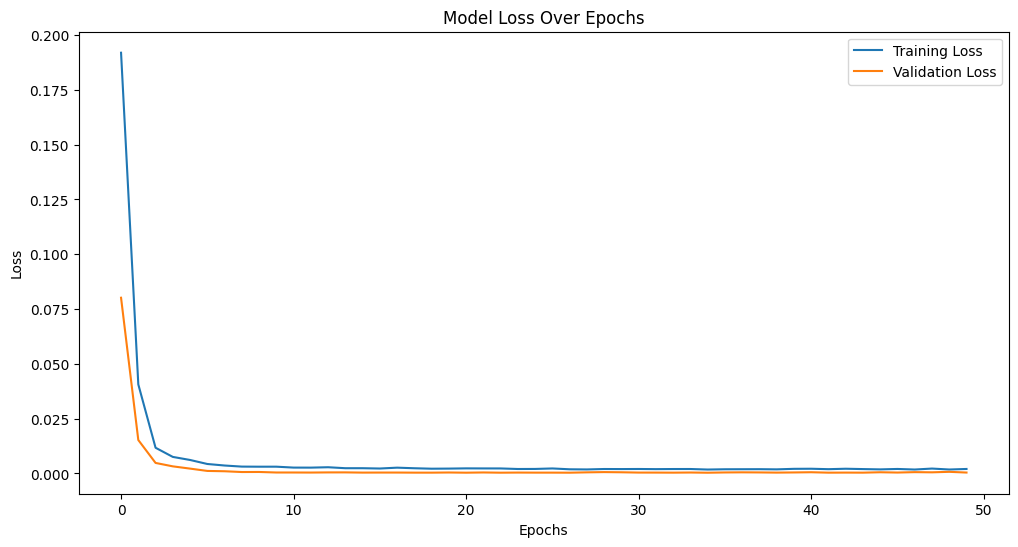

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1662 - val_loss: 0.0089
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0147 - val_loss: 0.0031
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - val_loss: 0.0020
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0070 - val_loss: 9.9949e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0055 - val_loss: 8.2588e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0045 - val_loss: 6.6004e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0043 - val_loss: 5.1557e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037 - val_loss: 5.5123e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 4.5243e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - val_loss: 6.2814e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - val_loss: 3.8065e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━

In [104]:
# Assuming y_train and y_test are Pandas Series

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Reshape input to be [samples, time steps, features]# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
X_train_gru = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_gru = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Initialize the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_gru, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_gru_scaled = model.predict(X_test_gru)
y_pred_gru = scaler_y.inverse_transform(y_pred_gru_scaled)

# Calculate performance metrics
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mape_gru = mean_absolute_percentage_error(y_test, y_pred_gru)

GRU:
Mean Squared Error: 3.626631102223578
R^2 Score: 0.994029706432976
Mean Absolute Error: 1.4881235083212372
Mean Absolute Percentage Error: 0.018235920751263342



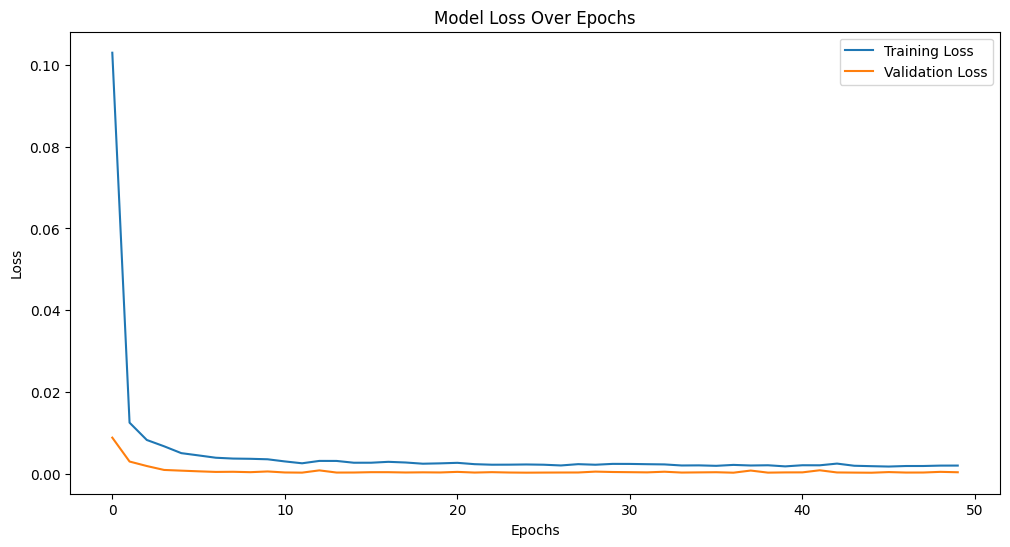

In [105]:
print(f'GRU:')
print(f'Mean Squared Error: {mse_gru}')
print(f'R^2 Score: {r2_gru}')
print(f'Mean Absolute Error: {mae_gru}')
print(f'Mean Absolute Percentage Error: {mape_gru}\n')

# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **CNN Model**

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [107]:
# Assuming y_train and y_test are Pandas Series

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Reshape input to be [samples, time steps, features]
X_train_cnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [108]:
# Initialize the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_cnn, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0655 - val_loss: 0.0125
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - val_loss: 0.0056
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0025
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0013
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - val_loss: 0.0014
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 8.6471e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 8.5374e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 7.9810e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [109]:
# Make predictions
y_pred_cnn_scaled = model.predict(X_test_cnn)
y_pred_cnn = scaler_y.inverse_transform(y_pred_cnn_scaled)

# Calculate performance metrics
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mape_cnn = mean_absolute_percentage_error(y_test, y_pred_cnn)

print(f'CNN:')
print(f'Mean Squared Error: {mse_cnn}')
print(f'R^2 Score: {r2_cnn}')
print(f'Mean Absolute Error: {mae_cnn}')
print(f'Mean Absolute Percentage Error: {mape_cnn}\n')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
CNN:
Mean Squared Error: 4.48880037482518
R^2 Score: 0.9926103716517948
Mean Absolute Error: 1.5670392778136342
Mean Absolute Percentage Error: 0.018203983945628003



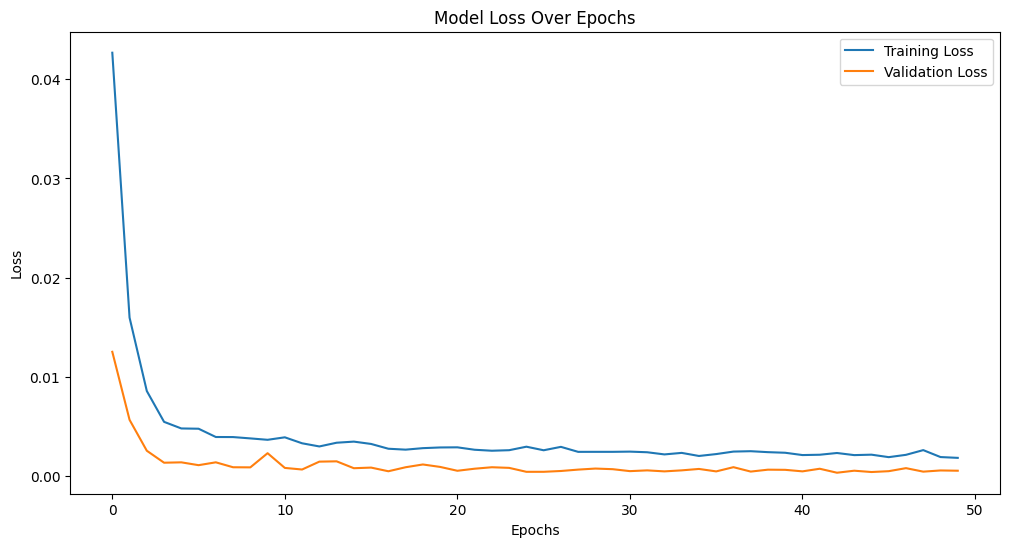

In [110]:
# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Model Trainig and Feature Enginering for GOOGL Stock Data**

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for a specific stock, e.g., 'GOOGL'
stock_data = prices_split_adjusted[prices_split_adjusted['symbol'] == 'GOOGL'].copy()
stock_data.set_index('date', inplace=True)

# Create features based on historical prices
stock_data['SMA_50'] = stock_data['close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['close'].rolling(window=200).mean()
stock_data['Exp1'] = stock_data['close'].ewm(span=12, adjust=False).mean()
stock_data['Exp2'] = stock_data['close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = stock_data['Exp1'] - stock_data['Exp2']
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()
stock_data['Delta'] = stock_data['close'].diff()
stock_data['Gain'] = stock_data['Delta'].clip(lower=0)
stock_data['Loss'] = -stock_data['Delta'].clip(upper=0)
stock_data['Avg_Gain'] = stock_data['Gain'].rolling(window=14).mean()
stock_data['Avg_Loss'] = stock_data['Loss'].rolling(window=14).mean()
stock_data['RS'] = stock_data['Avg_Gain'] / stock_data['Avg_Loss']
stock_data['RSI'] = 100 - (100 / (1 + stock_data['RS']))

# Drop rows with NaN values
stock_data.dropna(inplace=True)

# Feature Selection for selected data

# Define features and target variable
features = [ 'SMA_50', 'SMA_200', 'MACD', 'Signal_Line', 'RSI','high','low','open']
X = stock_data[features]
y = stock_data['close'].shift(-1).dropna()

# Align features with target variable
X = X[:-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
stock_data

,symbol,open,close,low,high,volume,SMA_50,SMA_200,Exp1,Exp2,MACD,Signal_Line,Delta,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI
date,,,,,,,,,,,,,,,,,,,
2010-10-18,GOOGL,300.575566,309.164158,300.575566,310.155155,14182200.0,250.308013,259.750679,277.752307,266.192673,11.559634,8.268723,8.138123,8.138123,-0.000000,3.806307,0.569499,6.683602,86.985270
2010-10-19,GOOGL,304.729740,304.219212,301.731724,307.717716,9166600.0,251.333838,259.703331,281.824139,269.009454,12.814685,9.177916,-4.944946,0.000000,4.944946,3.787718,0.922710,4.104993,80.411335
2010-10-20,GOOGL,304.374363,304.294285,304.054051,308.998997,7043100.0,252.377582,259.663266,285.281084,271.623145,13.657939,10.073920,0.075073,0.075073,-0.000000,3.793080,0.854786,4.437459,81.609057
2010-10-21,GOOGL,306.061070,306.301304,303.303318,308.308323,5835100.0,253.581285,259.672600,288.514964,274.191897,14.323067,10.923750,2.007019,2.007019,-0.000000,3.936438,0.848707,4.638160,82.263717
2010-10-22,GOOGL,306.266270,306.571568,305.330326,307.717716,4507600.0,254.787692,259.718721,291.292903,276.590391,14.702512,11.679502,0.270264,0.270264,-0.000000,3.955743,0.731805,5.405461,84.388320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,GOOGL,808.010010,807.799988,805.109985,810.969971,764100.0,798.427997,770.316900,806.925514,800.666674,6.258839,4.881141,-1.880005,0.000000,1.880005,3.472857,1.359998,2.553574,71.859318
2016-12-27,GOOGL,808.679993,809.929993,805.799988,816.000000,974400.0,798.534597,770.615350,807.387741,801.352846,6.034895,5.111892,2.130005,2.130005,-0.000000,3.625000,1.214286,2.985294,74.907749
2016-12-28,GOOGL,813.330017,804.570007,802.440002,813.330017,1199700.0,798.489197,770.885350,806.954244,801.591154,5.363089,5.162131,-5.359986,0.000000,5.359986,2.532859,1.597142,1.585870,61.328290


# **LSTM Model**

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [114]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

In [115]:
# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Reshape input to be [samples, time steps, features]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [116]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2206 - val_loss: 0.0560
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - val_loss: 0.0097
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - val_loss: 0.0040
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - val_loss: 0.0023
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - val_loss: 8.2176e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - val_loss: 5.3959e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - val_loss: 4.4519e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 5.3506e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 4.2268e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - 

In [117]:
# Make predictions
y_pred_lstm_scaled = model.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

# Calculate performance metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)

print(f'LSTM:')
print(f'Mean Squared Error: {mse_lstm}')
print(f'R^2 Score: {r2_lstm}')
print(f'Mean Absolute Error: {mae_lstm}')
print(f'Mean Absolute Percentage Error: {mape_lstm}\n')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
LSTM:
Mean Squared Error: 117.5280601250507
R^2 Score: 0.9960843159272007
Mean Absolute Error: 8.014629667898689
Mean Absolute Percentage Error: 0.017854631584101034



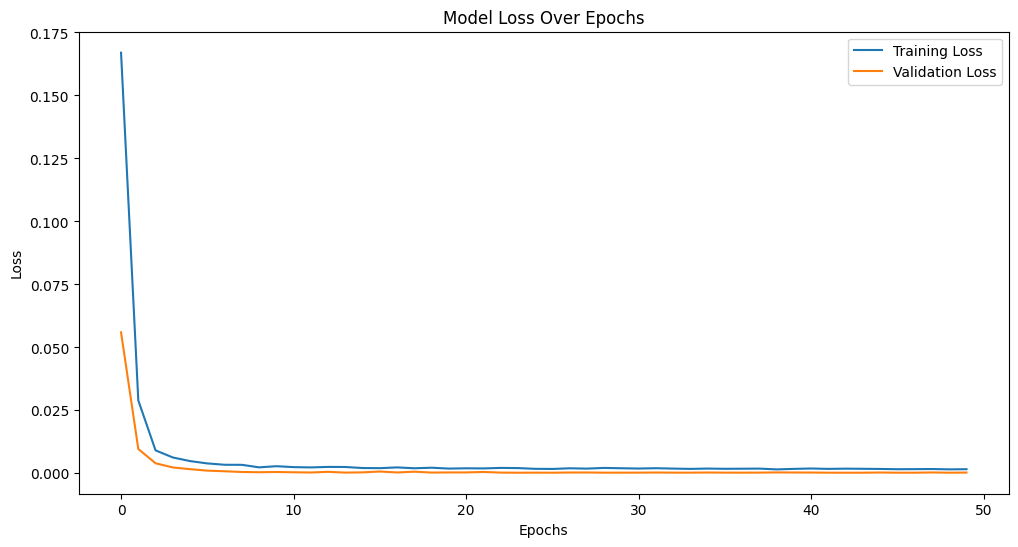

In [118]:
# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **GRU Model**

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [120]:
# Assuming y_train and y_test are Pandas Series

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Reshape input to be [samples, time steps, features]
X_train_gru = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_gru = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Initialize the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_gru, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_gru_scaled = model.predict(X_test_gru)
y_pred_gru = scaler_y.inverse_transform(y_pred_gru_scaled)

# Calculate performance metrics
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mape_gru = mean_absolute_percentage_error(y_test, y_pred_gru)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1482 - val_loss: 0.0036
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096 - val_loss: 0.0017
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0079 - val_loss: 8.7034e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 6.5202e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - val_loss: 3.2342e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - val_loss: 4.4492e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0042 - val_loss: 4.6311e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0040 - val_loss: 9.5423e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - val_loss: 2.9914e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - val_loss: 3.7294e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - val_loss: 2.5466e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6m

GRU:
Mean Squared Error: 130.32091932195664
R^2 Score: 0.9956580960529886
Mean Absolute Error: 8.089059262933159
Mean Absolute Percentage Error: 0.017602664744070906



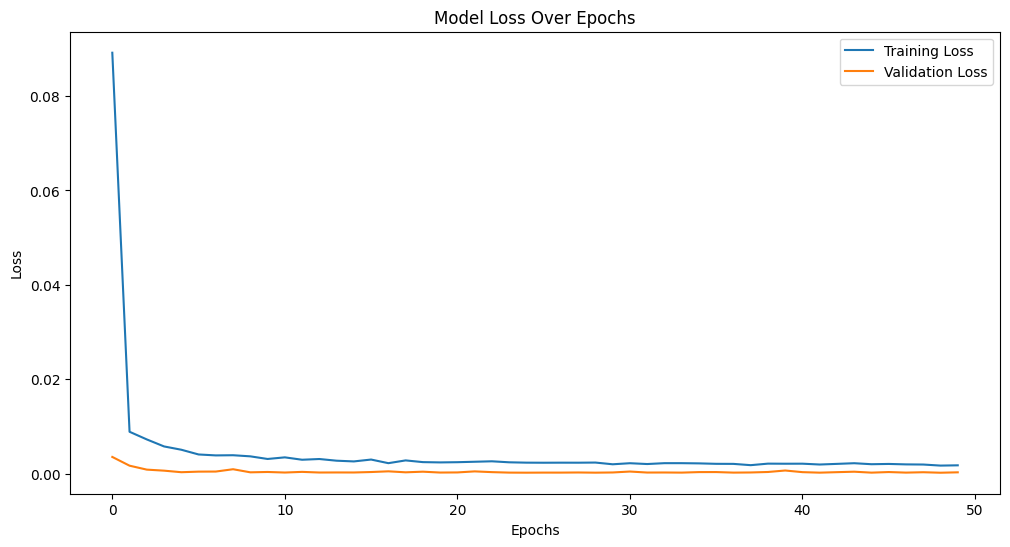

In [121]:
print(f'GRU:')
print(f'Mean Squared Error: {mse_gru}')
print(f'R^2 Score: {r2_gru}')
print(f'Mean Absolute Error: {mae_gru}')
print(f'Mean Absolute Percentage Error: {mape_gru}\n')

# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **CNN Model**

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [123]:
# Assuming y_train and y_test are Pandas Series

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Reshape input to be [samples, time steps, features]
X_train_cnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [124]:
# Initialize the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_cnn, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1749 - val_loss: 0.0176
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0225 - val_loss: 0.0097
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168 - val_loss: 0.0054
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - val_loss: 0.0031
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - val_loss: 0.0022
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0017
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - val_loss: 0.0018
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - val_loss: 8.0472e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - val_loss: 6.6

In [125]:
# Make predictions
y_pred_cnn_scaled = model.predict(X_test_cnn)
y_pred_cnn = scaler_y.inverse_transform(y_pred_cnn_scaled)

# Calculate performance metrics
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mape_cnn = mean_absolute_percentage_error(y_test, y_pred_cnn)

print(f'CNN:')
print(f'Mean Squared Error: {mse_cnn}')
print(f'R^2 Score: {r2_cnn}')
print(f'Mean Absolute Error: {mae_cnn}')
print(f'Mean Absolute Percentage Error: {mape_cnn}\n')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
CNN:
Mean Squared Error: 186.05901646816494
R^2 Score: 0.9938010690671665
Mean Absolute Error: 10.357585070340308
Mean Absolute Percentage Error: 0.021435858996244866



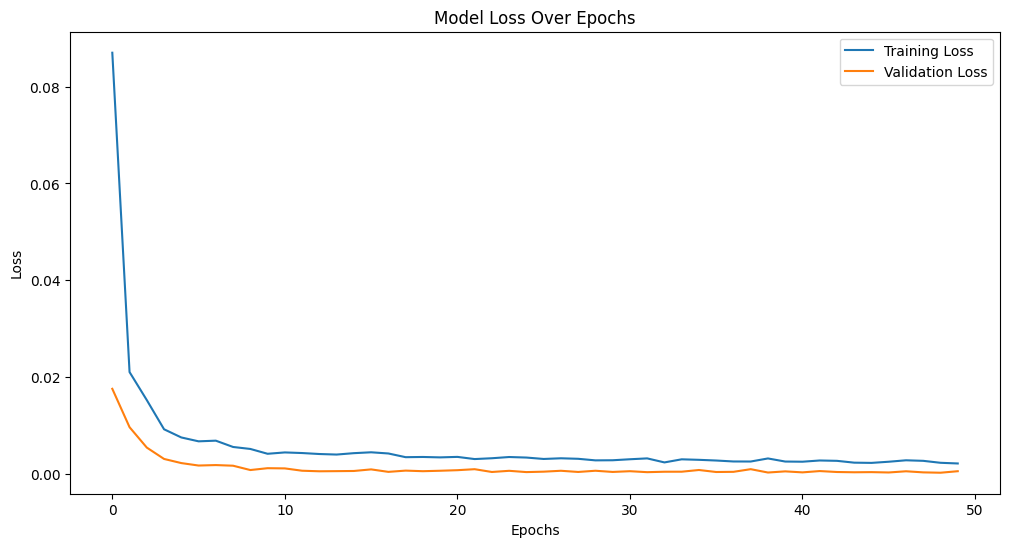

In [126]:
# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Model Trainig and Feature Enginering for MSFT Stock Data**

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for a specific stock, e.g., 'AAPL'
stock_data = prices_split_adjusted[prices_split_adjusted['symbol'] == 'MSFT'].copy()
stock_data.set_index('date', inplace=True)

# Create features based on historical prices
stock_data['SMA_50'] = stock_data['close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['close'].rolling(window=200).mean()
stock_data['Exp1'] = stock_data['close'].ewm(span=12, adjust=False).mean()
stock_data['Exp2'] = stock_data['close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = stock_data['Exp1'] - stock_data['Exp2']
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()
stock_data['Delta'] = stock_data['close'].diff()
stock_data['Gain'] = stock_data['Delta'].clip(lower=0)
stock_data['Loss'] = -stock_data['Delta'].clip(upper=0)
stock_data['Avg_Gain'] = stock_data['Gain'].rolling(window=14).mean()
stock_data['Avg_Loss'] = stock_data['Loss'].rolling(window=14).mean()
stock_data['RS'] = stock_data['Avg_Gain'] / stock_data['Avg_Loss']
stock_data['RSI'] = 100 - (100 / (1 + stock_data['RS']))

# Drop rows with NaN values
stock_data.dropna(inplace=True)

# Feature Selection for selected data

# Define features and target variable
features = [ 'SMA_50', 'SMA_200', 'MACD', 'Signal_Line', 'RSI','high','low','open']
X = stock_data[features]
y = stock_data['close'].shift(-1).dropna()

# Align features with target variable
X = X[:-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
stock_data

,symbol,open,close,low,high,volume,SMA_50,SMA_200,Exp1,Exp2,MACD,Signal_Line,Delta,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI
date,,,,,,,,,,,,,,,,,,,
2010-10-18,MSFT,25.590000,25.820000,25.450001,25.950001,48330500.0,24.5684,27.15600,25.029645,24.820402,0.209243,0.069776,0.279999,0.279999,-0.000000,0.144286,0.062857,2.295455,69.655172
2010-10-19,MSFT,25.270000,25.100000,24.950001,25.370001,66150900.0,24.5582,27.12675,25.040469,24.841113,0.199356,0.095692,-0.720000,0.000000,0.720000,0.144286,0.101429,1.422535,58.720930
2010-10-20,MSFT,25.260000,25.309999,25.100000,25.400000,56283600.0,24.5630,27.09850,25.081935,24.875845,0.206089,0.117771,0.209999,0.209999,-0.000000,0.159286,0.100714,1.581560,61.263726
2010-10-21,MSFT,25.400000,25.420000,25.049999,25.540001,50032400.0,24.5742,27.07175,25.133945,24.916153,0.217792,0.137775,0.110001,0.110001,-0.000000,0.167143,0.092857,1.800001,64.285732
2010-10-22,MSFT,25.520000,25.379999,25.270000,25.540001,25837900.0,24.5920,27.04640,25.171799,24.950512,0.221287,0.154478,-0.040001,0.000000,0.040001,0.167143,0.062143,2.689652,72.897174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,MSFT,63.450001,63.240002,62.799999,63.540001,12403800.0,60.4170,55.90105,62.701983,61.731150,0.970834,0.850234,-0.309997,0.000000,0.309997,0.337143,0.121428,2.776474,73.520275
2016-12-27,MSFT,63.209999,63.279999,63.209999,64.070000,11763200.0,60.5342,55.95160,62.790909,61.845879,0.945030,0.869193,0.039997,0.039997,-0.000000,0.340000,0.102143,3.328675,76.898242
2016-12-28,MSFT,63.400002,62.990002,62.830002,63.400002,14653300.0,60.6496,55.99860,62.821539,61.930629,0.890910,0.873536,-0.289997,0.000000,0.289997,0.238571,0.122857,1.941865,66.007963


# **LSTM Model**

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [129]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

In [130]:
# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Reshape input to be [samples, time steps, features]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [131]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1574 - val_loss: 0.0309
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 - val_loss: 0.0056
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - val_loss: 0.0024
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 9.2457e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 - val_loss: 5.8881e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 5.7429e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - val_loss: 4.2470e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 3.6913e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - val_loss: 3.1056e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

In [132]:
# Make predictions
y_pred_lstm_scaled = model.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

# Calculate performance metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)

print(f'LSTM:')
print(f'Mean Squared Error: {mse_lstm}')
print(f'R^2 Score: {r2_lstm}')
print(f'Mean Absolute Error: {mae_lstm}')
print(f'Mean Absolute Percentage Error: {mape_lstm}\n')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
LSTM:
Mean Squared Error: 0.6059078295117086
R^2 Score: 0.9945152082708504
Mean Absolute Error: 0.5786519845313903
Mean Absolute Percentage Error: 0.015108047611658548



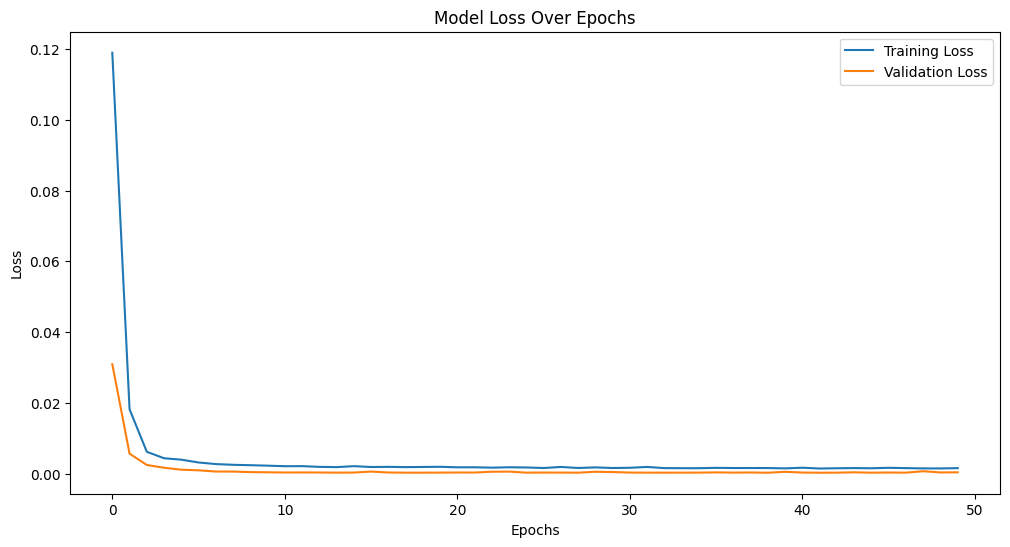

In [133]:
# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **GRU Model**

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [135]:
# Assuming y_train and y_test are Pandas Series

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Reshape input to be [samples, time steps, features]
X_train_gru = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_gru = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Initialize the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_gru, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_gru_scaled = model.predict(X_test_gru)
y_pred_gru = scaler_y.inverse_transform(y_pred_gru_scaled)

# Calculate performance metrics
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mape_gru = mean_absolute_percentage_error(y_test, y_pred_gru)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1268 - val_loss: 0.0037
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - val_loss: 0.0015
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - val_loss: 8.9765e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - val_loss: 6.0409e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - val_loss: 4.6210e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val_loss: 4.0637e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - val_loss: 8.6825e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - val_loss: 8.3496e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0035 - val_loss: 4.2034e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 4.7494e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - val_loss: 3.1147e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10

GRU:
Mean Squared Error: 0.40732655305684307
R^2 Score: 0.9963128033663641
Mean Absolute Error: 0.4536785361304725
Mean Absolute Percentage Error: 0.012043054674661963



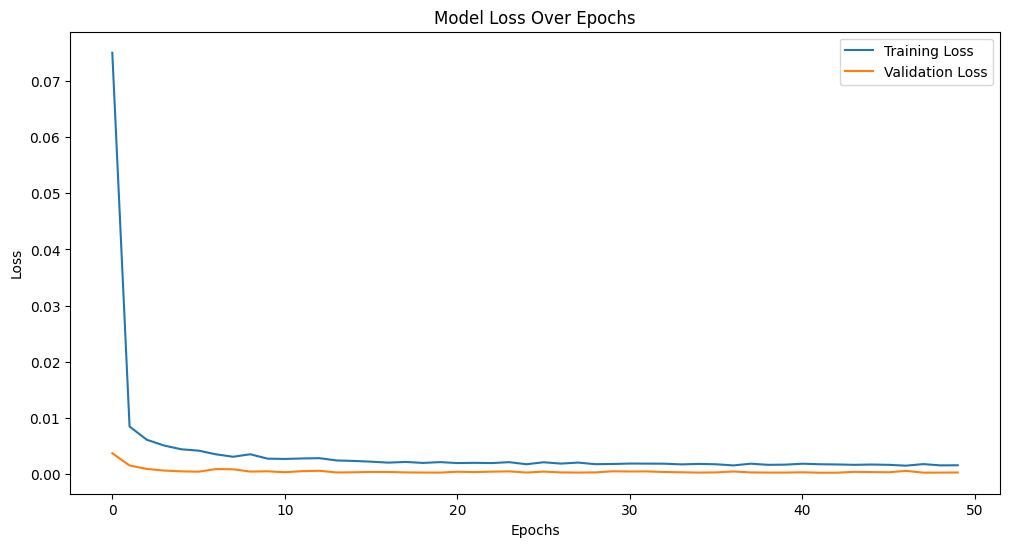

In [136]:
print(f'GRU:')
print(f'Mean Squared Error: {mse_gru}')
print(f'R^2 Score: {r2_gru}')
print(f'Mean Absolute Error: {mae_gru}')
print(f'Mean Absolute Percentage Error: {mape_gru}\n')

# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **CNN Model**

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [138]:
# Assuming y_train and y_test are Pandas Series

# Convert y_train and y_test to NumPy arrays and reshape them
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

# Reshape input to be [samples, time steps, features]
X_train_cnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [139]:
# Initialize the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train_cnn, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1111 - val_loss: 0.0139
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - val_loss: 0.0075
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - val_loss: 0.0052
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0039
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0020
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - val_loss: 0.0019
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - val_loss: 8.5986e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - val_loss: 8.0371e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 7.0911e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - val_

In [140]:
# Make predictions
y_pred_cnn_scaled = model.predict(X_test_cnn)
y_pred_cnn = scaler_y.inverse_transform(y_pred_cnn_scaled)

# Calculate performance metrics
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mape_cnn = mean_absolute_percentage_error(y_test, y_pred_cnn)

print(f'CNN:')
print(f'Mean Squared Error: {mse_cnn}')
print(f'R^2 Score: {r2_cnn}')
print(f'Mean Absolute Error: {mae_cnn}')
print(f'Mean Absolute Percentage Error: {mape_cnn}\n')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
CNN:
Mean Squared Error: 0.621069115961266
R^2 Score: 0.9943779654519405
Mean Absolute Error: 0.5870121298531723
Mean Absolute Percentage Error: 0.015759465903284257



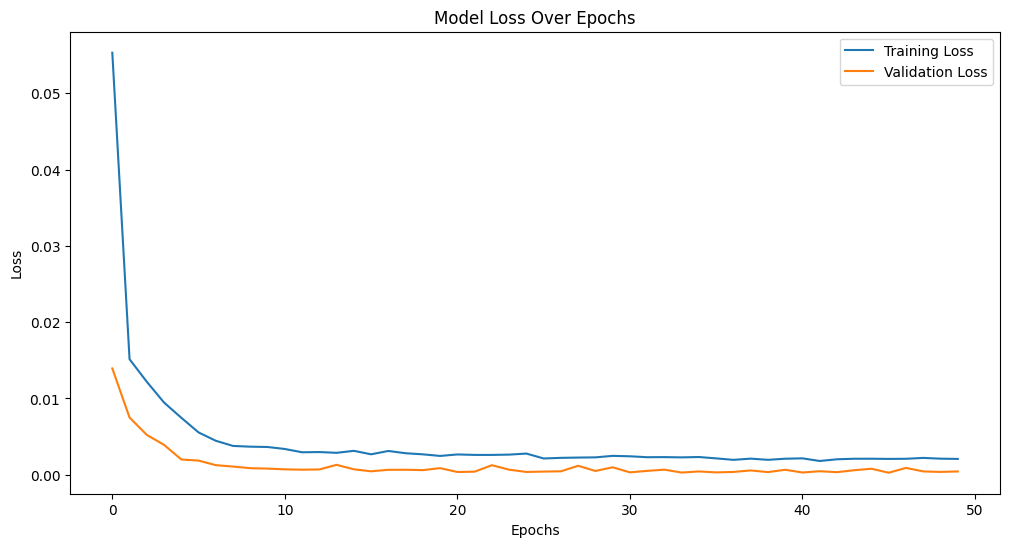

In [141]:
# Plot the history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()